# **Correlations in Movie Data** 

### **Objective**

The objective of this project is to determine if there is a linear relatinship between a movie's gross box office total and other attributes such as genre, director, budget, and others.  

### **Project Features**
- Python
- Pandas, Seaborn, Numpy, Matplotlib, Jupyter Notebooks
- Correlation matrices, scatterplots, heatmaps

### **Table of contents**
1. Objective
2. Data Cleaning & Processing
3. Data Analysis
4. Conclusion

**Importing relevent libraries**

In [239]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

**Adjusting the parameters of the visualizations**

In [240]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) 

**Uploading data from csv file**

In [241]:
df = pd.read_csv(r'C:\Users\Jonbi\Desktop\Data\movies.csv')

### **Data Cleaning**

**Examining a preview of the data**

In [242]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


**Determining the number of records and attributes of the df**

In [243]:
df.shape

(7668, 15)

**Viewing data types of each attribute**

In [244]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

**Finding the percentage of missing data for each column**

In [245]:
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


**Since only a small number of records contain missing data and the df contains over 5,000 records, I'm going to remove them from the dataframe entirely.**

In [246]:
df = df.dropna()

**Checking to make sure the rows with missing data were removed**

In [247]:
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


**The budget and gross attributes are listed as objects. They should be converted integers.**

In [248]:
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

**I've noticed that the year column often doesnt match the released column. Need to create a new year column based on the year specified in the released column**
**Changing the year column datatype into a string and creating a new column (year_corrected) based on the year column**

In [249]:
df['year_corrected'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


**Checking for duplicates by finding rows with matching name and released attributes. None found.**

In [250]:
df[df[['name', 'released']].duplicated()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected


**Sorting the dataframe by company name**

In [251]:
df.sort_values(by=['company'], inplace=False, ascending=True)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
4345,A Man Apart,R,Action,2003,"April 4, 2003 (United States)",6.1,46000.0,F. Gary Gray,Christian Gudegast,Vin Diesel,United States,36000000,44350926,"""DIA"" Productions GmbH & Co. KG",109.0,2003
7525,Weathering with You,PG-13,Animation,2019,"January 17, 2020 (United States)",7.5,28000.0,Makoto Shinkai,Makoto Shinkai,Kotaro Daigo,Japan,11100000,193457467,"""Weathering With You"" Film Partners",112.0,2020
3024,Schizopolis,Not Rated,Comedy,1996,"April 9, 1997 (United States)",6.8,5300.0,Steven Soderbergh,Steven Soderbergh,Steven Soderbergh,United States,250000,10580,.406 Production,96.0,1997
2929,Jingle All the Way,PG,Adventure,1996,"November 22, 1996 (United States)",5.6,95000.0,Brian Levant,Randy Kornfield,Arnold Schwarzenegger,United States,60000000,129832389,1492 Pictures,89.0,1996
3525,Bicentennial Man,PG,Comedy,1999,"December 17, 1999 (United States)",6.9,112000.0,Chris Columbus,Isaac Asimov,Robin Williams,United States,100000000,87423861,1492 Pictures,132.0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6420,Upstream Color,Not Rated,Drama,2013,"August 30, 2013 (United Kingdom)",6.7,32000.0,Shane Carruth,Shane Carruth,Amy Seimetz,United States,50000,587174,erbp,96.0,2013
6793,Dope,R,Adventure,2015,"June 19, 2015 (United States)",7.2,82000.0,Rick Famuyiwa,Rick Famuyiwa,Shameik Moore,United States,7000000,17986781,i am OTHER,103.0,2015
4007,The Deep End,R,Crime,2001,"August 31, 2001 (United States)",6.6,11000.0,Scott McGehee,Elisabeth Sanxay Holding,Tilda Swinton,United States,3000000,10031529,i5 Films,101.0,2001
5664,Incendies,R,Drama,2010,"January 12, 2011 (France)",8.3,158000.0,Denis Villeneuve,Denis Villeneuve,Lubna Azabal,Canada,6800000,7099598,micro_scope,131.0,2011


**Checking company data for typos, duplicated entries etc**

In [252]:
print(df['company'].value_counts())

Universal Pictures                     330
Columbia Pictures                      302
Warner Bros.                           298
Paramount Pictures                     279
Twentieth Century Fox                  209
                                      ... 
Cinépix Film Properties (CFP)            1
Intermedia Films                         1
Dollface                                 1
Calimari Productions                     1
Beijing Diqi Yinxiang Entertainment      1
Name: company, Length: 1475, dtype: int64


### **Data Analysis**

**Building a matrix of the pearson correlation for each variable pair**


**We can see that the strongest correlation is between budget and gross, with a weaker correlation existing between gross and votes.**


# ![title](forumla.png)

Text(86.09375, 0.5, 'Movie Features')

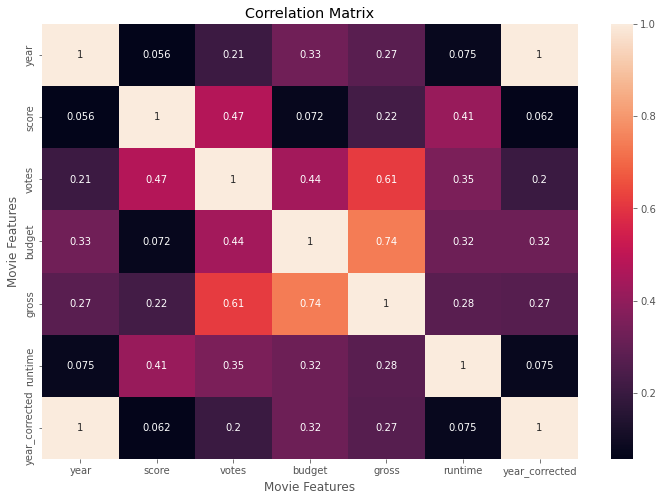

In [253]:

correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

**Data also contains many categorical attributes that may be correlated.**
**Converting categorical data into integers so that we can check for correlations**

In [254]:
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

**Plotting a larger correlation matrix that includes the categorical attributes**

Text(86.09375, 0.5, 'Movie Features')

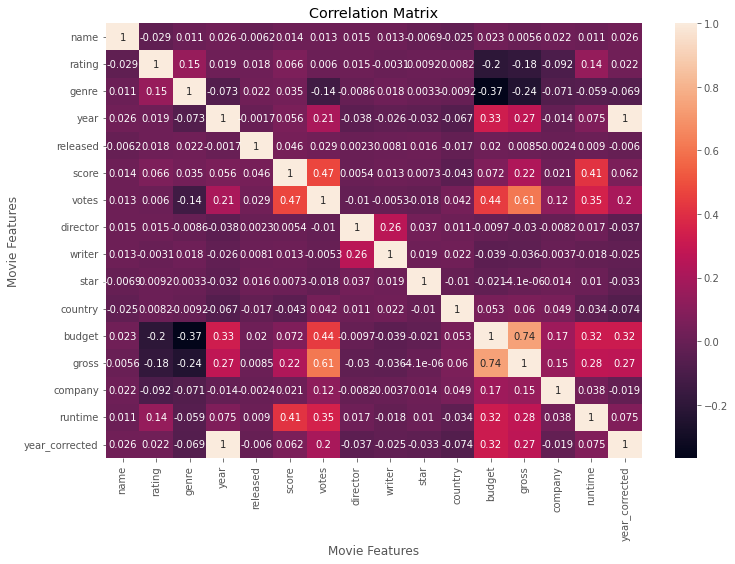

In [255]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

**Several attributes were added, but no additional relationships were found.**
**Using a scatter plot to visualize the reationships between the variables with strong correlations**

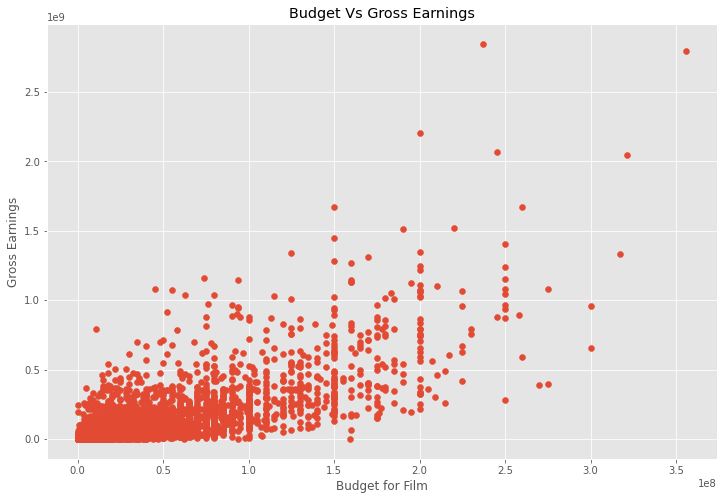

In [256]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget Vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

**Using a scatter plot to visualize the correlation between votes and gross.**

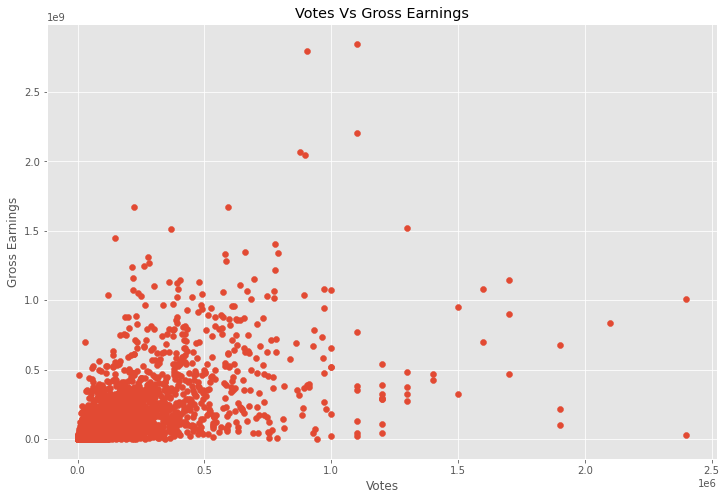

In [257]:
plt.scatter(x=df['votes'], y=df['gross'])
plt.title('Votes Vs Gross Earnings')
plt.xlabel('Votes')
plt.ylabel('Gross Earnings')
plt.show()

**The scatter plots confirm the positive linear relationship between both variable pairs. It seems that movies with larger budgets generally earn more money than movies with small budgets and movies which earn more**
**money at the box office generally receive more votes on IMDB than movies with smaller budgets. We can plot a text matrix of the pearson correlations to be sure we didn't miss anything.**

In [258]:
correlation_matrix_text = df_numerized.corr()
correlation_pairs = correlation_matrix_text.unstack()
sorted_pairs = correlation_pairs.sort_values()
sorted_pairs

genre           budget           -0.368523
budget          genre            -0.368523
gross           genre            -0.244101
genre           gross            -0.244101
rating          budget           -0.203946
                                    ...   
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
year_corrected  year_corrected    1.000000
Length: 256, dtype: float64

**Sorting the data**

In [259]:
high_correlation = sorted_pairs[(sorted_pairs) > 0.5]
high_correlation

gross           votes             0.614751
votes           gross             0.614751
gross           budget            0.740247
budget          gross             0.740247
year            year_corrected    0.998726
year_corrected  year              0.998726
name            name              1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
year_corrected  year_corrected    1.000000
dtype: float64

### **Conclusion**

Thanks so much for the great, straightforward tutorial. I am trying to use the scikit-learn methods to determine how to convert my categorical data and I have a couple of questions. First can you also use get_dummies and would that work just as well even though you end up with 1 less binary column? Also once you have converted the categorical variable you have several new binary columns but you also still have the original text form of the categorical variable. 